## DS 862 Machine Learning for Business Analysts Fall 2020

### Clustering Analysis

#### Submitted by:
* Di Wang

For this assignment, we will explore the use of clustering in two different ways: 
1. clustering as data exploration 
2. image compression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.preprocessing import StandardScaler

#### 1. Clustering as data exploration
For this application we will use clustering to perform customer segmentation. Typically there are models such as RFM model, LTV models, etc., to perform such task. We (might) talk about these later in the semester. For this assignment, we will just use the data as-is (with some scaling, etc.) to perform clustering.

The dataset to use is credit card dataset that can be found [here](https://www.kaggle.com/arjunbhasin2013/ccdata/data) on Kaggle. The goal is to segment the customers into group, to reveal (any) hidden pattern within the customers.

Following is the Data Dictionary for Credit Card dataset :

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [2]:
# Load data
CC = pd.read_csv("creditcard.csv")
CC.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


First remove the CUST_ID column (since we want all numeric features). Then remove missing values and scale the data, since the features are on different scale. Save the scaled data as a different variable.

In [3]:
# Remove CUST_ID
data = CC.copy()
data.drop("CUST_ID", inplace = True, axis = 1)

# Remove missing values
data.dropna(inplace = True)

# Scale data
scaler = StandardScaler() # Instantiate
x = data.values
scale_data = scaler.fit_transform(x) # Fit the data
data_s = pd.DataFrame(scale_data)
data_s.columns = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES',
                  'INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
                  'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
                  'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT',
                  'PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
data_s.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.744625,-0.370047,-0.429184,-0.359160,-0.354826,-0.468655,-0.820769,-0.686280,-0.717179,-0.681953,-0.479437,-0.517623,-0.962575,-0.543942,-0.305508,-0.537727,0.355181
1,0.764152,0.067679,-0.473208,-0.359160,-0.458839,2.568556,-1.236139,-0.686280,-0.926522,0.557022,0.099258,-0.597054,0.677204,0.796852,0.087689,0.212380,0.355181
2,0.426602,0.505405,-0.116413,0.099909,-0.458839,-0.468655,1.256077,2.646651,-0.926522,-0.681953,-0.479437,-0.120467,0.813852,-0.399503,-0.099906,-0.537727,0.355181
3,-0.373910,0.505405,-0.465825,-0.349660,-0.458839,-0.468655,-1.028455,-0.408536,-0.926522,-0.681953,-0.479437,-0.557339,-0.907916,-0.380165,-0.261131,-0.537727,0.355181
4,0.099551,0.505405,0.142062,-0.359160,0.994815,-0.468655,0.425339,-0.686280,0.538882,-0.681953,-0.479437,-0.279329,-0.743938,-0.132119,0.650363,-0.537727,0.355181


Notice this dataset doesn't have label, hence it's an excellent dataset to practice clustering (or unsupervised) techniques. We will use Hierarchical clustering, DBScan, and Gaussian Mixture Models on this dataset. K-Means will be used in the next exercise.

For each method, I want you to do the following:
1. Perform clustering that gives you between 3-5 clusters
2. Using the **original unscaled data** (without the customer ID), calculate the mean of each cluster
3. Describe your findings

This is a very simple approach to customer segmentation. We will group the customers into groups, and try to extract some common features from observations within the same group.

#### Hierarchical Clustering

We can first inspect the clustering visually using a dendrogram.

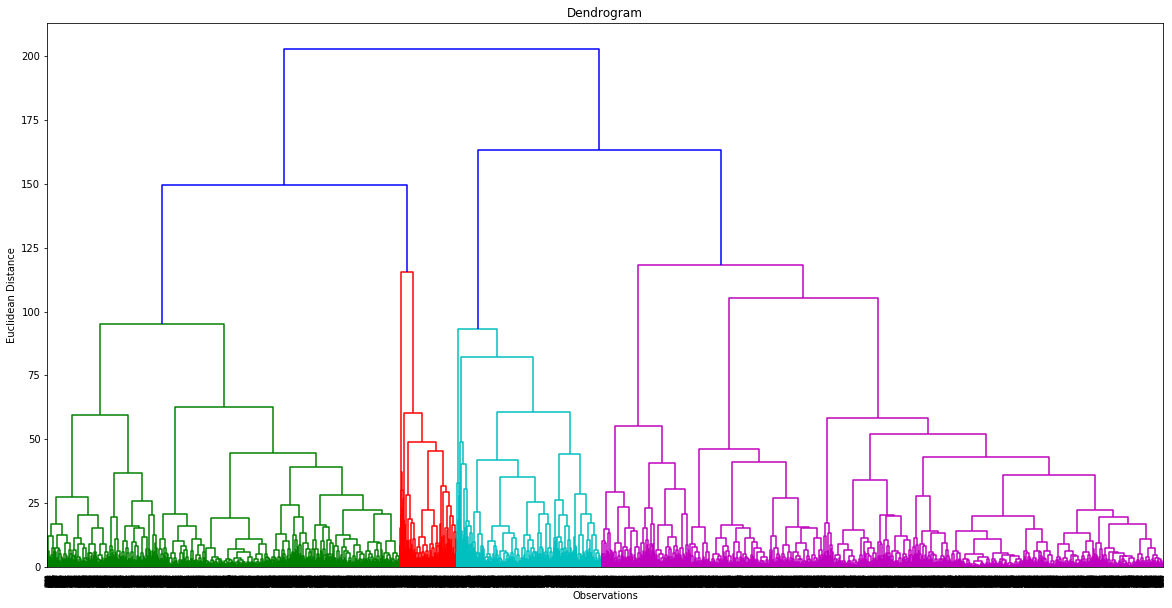

In [4]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(data_s, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean Distance')
plt.show()

Maybe we should try to group them in 4.

In [5]:
from sklearn.cluster import AgglomerativeClustering

# let's start with 3 clusters
AC3 = AgglomerativeClustering(n_clusters = 3)
AC3.fit(data_s)
print(AC3.labels_)

clusters3_agg = pd.concat([data, pd.DataFrame({'cluster':AC3.labels_})], axis=1)
clusters3_agg.groupby('cluster').mean()

[1 2 0 ... 1 1 1]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0.0,1691.250575,0.901596,1109.033629,663.193822,446.229967,1023.716499,0.507618,0.220259,0.375243,0.138687,3.413512,16.013055,4779.084415,1888.696888,927.225281,0.155074,11.650783
1.0,1570.462332,0.893536,978.688260,559.308861,419.659237,978.210637,0.484100,0.199342,0.360544,0.137452,3.260548,14.769011,4410.252971,1759.374865,821.128016,0.158584,11.598331
2.0,1764.055858,0.903101,1116.695583,721.049528,395.689815,1051.787746,0.494681,0.222318,0.363593,0.136846,3.396296,15.236111,5021.853956,1890.306021,986.891293,0.148891,11.593519


When we group the customers into 3 segments, it looks like on average:
* Group 1 and group 3 has a similar result in purchase amounts, cash in advance, payment amounts. We can not see their different characteristics easily. 
* Group 2 has the lowest balance amounts, lowest purchase amounts, lowest cash in advance, lowest payment amounts. They are the less risky customers.

In [6]:
# 4 clusters
AC4 = AgglomerativeClustering(n_clusters = 4)
AC4.fit(data_s)
print(AC4.labels_)

clusters4_agg = pd.concat([data, pd.DataFrame({'cluster':AC4.labels_})], axis=1)
clusters4_agg.groupby('cluster').mean()

[0 2 3 ... 0 0 0]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0.0,1570.462332,0.893536,978.688260,559.308861,419.659237,978.210637,0.484100,0.199342,0.360544,0.137452,3.260548,14.769011,4410.252971,1759.374865,821.128016,0.158584,11.598331
1.0,1753.893765,0.910189,1394.506362,872.569883,522.235211,1022.014720,0.534040,0.254448,0.390714,0.138157,3.183099,17.922535,5143.114241,1958.472797,745.874174,0.149536,11.638498
2.0,1764.055858,0.903101,1116.695583,721.049528,395.689815,1051.787746,0.494681,0.222318,0.363593,0.136846,3.396296,15.236111,5021.853956,1890.306021,986.891293,0.148891,11.593519
3.0,1681.134578,0.900208,1062.933787,629.382525,433.956187,1023.991313,0.503351,0.214737,0.372744,0.138773,3.450720,15.704701,4720.298703,1877.429058,956.510941,0.155969,11.652767


When we group the customers into 4 segments, it looks like on average:
* Group 1 has the the lowest balance, lowest purchase amounts, lowest cash in advance, lowest credit limit and lowest payment amounts. (low risk, but not that valuable)
* Group 2 has the highest purchase amounts, highest one-off purchases, hightest installment purchases, highest credit limit and highest payment amouts. (high risk, high valuable customers)
* Group 3 has the highest balance amounts, lowest installment purchases, highest cash in advance and highest minimum payments. (overall looks good, need to pay attention to every single transaction)
* Group 4 has almost everything on average, it should be the normal customer segment, without high risk and without high return.

In [7]:
# 5 clusters
AC5 = AgglomerativeClustering(n_clusters = 5)
AC5.fit(data_s)
print(AC5.labels_)

clusters5_agg = pd.concat([data, pd.DataFrame({'cluster':AC5.labels_})], axis=1)
clusters5_agg.groupby('cluster').mean()

[1 2 3 ... 4 4 4]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0.0,1753.893765,0.910189,1394.506362,872.569883,522.235211,1022.014720,0.534040,0.254448,0.390714,0.138157,3.183099,17.922535,5143.114241,1958.472797,745.874174,0.149536,11.638498
1.0,1629.186621,0.897809,990.225789,573.089376,417.448308,988.964031,0.485041,0.204062,0.359398,0.138302,3.253036,15.146569,4531.350243,1780.718796,850.608316,0.153433,11.613668
2.0,1764.055858,0.903101,1116.695583,721.049528,395.689815,1051.787746,0.494681,0.222318,0.363593,0.136846,3.396296,15.236111,5021.853956,1890.306021,986.891293,0.148891,11.593519
3.0,1681.134578,0.900208,1062.933787,629.382525,433.956187,1023.991313,0.503351,0.214737,0.372744,0.138773,3.450720,15.704701,4720.298703,1877.429058,956.510941,0.155969,11.652767
4.0,1252.507120,0.870401,916.219771,484.696009,431.630031,919.987752,0.479006,0.173787,0.366750,0.132852,3.301223,12.724771,3754.587156,1643.810860,661.510669,0.186473,11.515291


When we group the customers into 5 segments, it looks like on average:
* Group 1 has the highest purchases, highest installment purchases, highest credit limit and highest payment amounts. (most valuable customers for the business)
* Group 2 has the almost everything on average. (need to identify later)
* Group 3 has the highest balance amounts, lowest installment purchases, highest cash in advance and highest minimum payments. (overall looks good, need to pay attention to every single transaction)
* Group 4 has almost everything on average. (the purchase amounts and cash in advance are different with group 2)
* Group 5 has lowest balance amounts, lowest purchase amounts, lowest cash in advance and lowest payment amounts. (low risk, but not that valuable)

As we make more groups, it is more easy to identify the characteristics of different customers but may cause a similar group of behaviors. Looks like we 4 clustors it the best for this dataset. 

#### DBScan

In [8]:
# You may need to try different combinations of epsilon and min_samples to get to the appropriate number of clusters. 
# Use np.unique() to help you locate the unique number of clusters
# We will consider outliers as one cluster as well.

from sklearn.cluster import DBSCAN

# 3 clusters
dbscan3 = DBSCAN(eps=2, min_samples=5)
dbscan3.fit(data_s)
np.unique(dbscan3.labels_) # Number of unique clusters

array([-1,  0,  1], dtype=int64)

In [9]:
#check the ourliers
(dbscan3.labels_ == -1).sum()

593

In [10]:
dbscan3_agg = pd.concat([data, pd.DataFrame({'cluster':dbscan3.labels_})], axis=1)
dbscan3_agg.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
-1.0,1857.016718,0.899443,1372.752627,893.891366,479.099860,1144.028640,0.515367,0.238151,0.371373,0.139508,3.366025,16.131349,5009.807356,2124.023579,949.411619,0.151164,11.621716
0.0,1623.583325,0.897566,1019.200171,597.160611,422.333312,992.987723,0.492534,0.207789,0.365894,0.137707,3.332990,15.209713,4596.010322,1800.558552,876.578127,0.156451,11.617158
1.0,2205.533989,0.966667,2762.968000,2178.048000,584.920000,2877.539220,0.516667,0.433333,0.483333,0.133333,1.800000,38.200000,5660.000000,3704.364318,900.569681,0.073333,10.800000


Looks like the 3 clusters are group by medium risk, low risk and high risk

In [11]:
# 4 clusters
dbscan4 = DBSCAN(eps=2, min_samples=4)
dbscan4.fit(data_s)
np.unique(dbscan4.labels_) # Number of unique clusters

array([-1,  0,  1,  2], dtype=int64)

In [12]:
#check the ourliers
(dbscan4.labels_ == -1).sum()

569

In [13]:
dbscan4_agg = pd.concat([data, pd.DataFrame({'cluster':dbscan4.labels_})], axis=1)
dbscan4_agg.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
-1.0,1846.222859,0.899055,1374.660985,914.759836,460.149763,1143.104403,0.515738,0.239782,0.370777,0.139530,3.379562,16.114964,5021.350365,2107.840189,946.283929,0.148011,11.614964
0.0,1625.597098,0.897773,1020.975729,597.939820,423.328905,995.584649,0.492574,0.208036,0.365906,0.137796,3.333933,15.227676,4597.498154,1804.162640,877.418017,0.156236,11.617114
1.0,2726.956148,0.954546,1239.847500,501.505000,738.342500,166.341431,0.500000,0.166667,0.477273,0.083333,1.000000,24.500000,4675.000000,1216.304560,855.526184,0.194444,11.750000
2.0,150.351061,0.588636,1294.952500,0.000000,1294.952500,117.459103,0.516667,0.000000,0.491667,0.020833,0.250000,7.250000,3750.000000,1828.965232,140.689750,0.834091,11.500000


When we group the customers into 4 segments, it looks like on average:
* The outliers group has the highest purchase, highest one-off purchase, highest cash in advance, highest credit limit and highest payment amounts. Really need to pay attention to this group of customers. Maybe high valuable or high risk.
* Group 2 has the lowest installment purchases, and on average for the rest of the variables.
* Group 3 has the highest balance amounts, and lowset payment amounts. (lower risk)
* Group 4 has the lowest balance amounts, highest installment purchases. (high risk, pay attention)

In [14]:
# 5 clusters
dbscan5 = DBSCAN(eps=2.5, min_samples=4)
dbscan5.fit(data_s)
np.unique(dbscan5.labels_) # Number of unique clusters

array([-1,  0,  1,  2,  3], dtype=int64)

In [15]:
#check the ourliers
(dbscan5.labels_ == -1).sum()

316

In [16]:
dbscan5_agg = pd.concat([data, pd.DataFrame({'cluster':dbscan5.labels_})], axis=1)
dbscan5_agg.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
-1.0,1905.895559,0.891735,1459.145461,945.277961,514.022961,1277.868966,0.543858,0.231643,0.401547,0.141558,3.661184,16.578947,5279.440789,2292.303039,997.238737,0.153100,11.618421
0.0,1627.904377,0.897838,1028.415431,605.477963,423.232789,994.132237,0.492273,0.209012,0.365200,0.137757,3.323445,15.247788,4598.015472,1805.881285,876.849746,0.156223,11.617475
1.0,2089.687353,0.977273,1610.295000,859.710000,750.585000,844.314464,0.805555,0.430555,0.625000,0.097222,2.750000,18.500000,5850.000000,3278.267339,1470.807358,0.041667,11.250000
2.0,2585.029875,1.000000,535.867500,485.335000,50.532500,326.974524,0.375000,0.333333,0.083334,0.020833,0.500000,5.000000,6125.000000,908.752056,768.266627,0.250000,12.000000
3.0,4123.408816,0.968750,1641.412500,1641.412500,0.000000,1777.870694,0.208333,0.208333,0.000000,0.153409,3.750000,2.000000,6250.000000,1720.394345,1102.624958,0.031250,10.500000


When we group the customers into 5 segments, it looks like the outliers group has almost everything on average. Group 2 to group 5 have their own identifiable characteristics. 
* Group 2 has the lowest balance amounts and lowest credit limit. (low risk)
* Group 3 has the highest installment purchases. (need to pay attention to their transactions)
* Group 4 has the lowest purchase amounts and lowest payment amounts. (low risk, less valuable)
* Group 5 has the highest balance amounts, highest purchase amounts, lowest installment purchases and highest cash in advance. (valuable but maybe high risk)

Therefore, it looks like we should group the customers into 4 groups.

#### GMM

In [17]:
from sklearn.mixture import GaussianMixture

# let's create 3 clusters
gm3 = GaussianMixture(n_components=3, n_init=10, random_state=123)
gm3.fit(data_s)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=123, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [18]:
gm3_agg = pd.concat([data, pd.DataFrame({'cluster':gm3.predict(data_s)})], axis=1)
gm3_agg.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0.0,1621.592647,0.892144,1070.259686,627.973643,442.740881,998.260256,0.503087,0.209456,0.376681,0.138371,3.333960,15.861365,4599.208772,1809.064352,874.601477,0.163072,11.620097
1.0,1631.700521,0.901228,981.701370,571.431988,410.306058,975.009299,0.468675,0.204008,0.345088,0.138908,3.345525,14.685992,4641.658944,1793.973354,878.199548,0.150550,11.600389
2.0,1683.548314,0.903520,1076.320689,660.069331,416.558862,1052.707948,0.509728,0.218524,0.374218,0.135483,3.320957,14.995603,4650.908449,1888.239515,898.511651,0.150145,11.632145


In [19]:
# 4 clusters
gm4 = GaussianMixture(n_components=4, n_init=10, random_state=123)
gm4.fit(data_s)
gm4_agg = pd.concat([data, pd.DataFrame({'cluster':gm4.predict(data_s)})], axis=1)
gm4_agg.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0.0,1601.010770,0.890841,1062.639230,617.738012,445.361569,988.318005,0.504101,0.209377,0.377438,0.137601,3.338901,15.905719,4548.340426,1792.722200,872.597569,0.162882,11.625708
1.0,1627.629245,0.902887,974.576199,573.798316,400.817555,980.621803,0.467308,0.202897,0.343112,0.138895,3.343855,14.610690,4610.043554,1793.342794,874.668602,0.150236,11.598064
2.0,1568.098934,0.885477,1055.413678,603.876983,452.337034,996.833641,0.489075,0.190483,0.373396,0.125453,3.064407,13.850847,4302.457627,1926.579404,881.041153,0.157943,11.583051
3.0,1753.430783,0.908246,1096.240435,682.008229,414.353992,1068.638401,0.511154,0.226631,0.372763,0.140849,3.399783,15.431287,4894.663912,1890.014226,907.904070,0.149790,11.635524


In [20]:
# 5 clusters
gm5 = GaussianMixture(n_components=5, n_init=10, random_state=123)
gm5.fit(data_s)
gm5_agg = pd.concat([data, pd.DataFrame({'cluster':gm5.predict(data_s)})], axis=1)
gm5_agg.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0.0,1628.715454,0.902449,1021.073121,600.791173,420.333372,1000.929259,0.478759,0.205535,0.358000,0.138996,3.343153,15.316967,4695.915704,1841.953301,868.374404,0.154629,11.593562
1.0,1546.832044,0.889092,1026.674591,586.226885,440.991673,988.462406,0.498212,0.201403,0.373609,0.135622,3.238703,15.216971,4450.141811,1751.128190,817.178085,0.160680,11.620559
2.0,1542.399627,0.887028,1036.611019,613.888971,423.339853,1029.603919,0.486164,0.197303,0.358581,0.129285,3.168067,14.243697,4265.159473,1896.201568,931.121183,0.155963,11.553571
3.0,1788.879884,0.907711,1053.928705,652.762396,401.221096,1013.353693,0.500883,0.226414,0.363509,0.142981,3.513263,15.633068,4902.153721,1858.095962,971.874009,0.152051,11.654288
4.0,1757.631822,0.908040,1249.135954,751.570560,497.650204,1026.836923,0.515748,0.230589,0.386698,0.139674,3.371501,16.190840,4860.178117,1903.453800,778.516432,0.151528,11.638677


Same as before, when we have more clusters, we can better see the credit card behavior among different group of people. However, 5 clusters show that a similar result may appears to different groups, so maybe we should use 4 clusters in this case.

On average:
* Group 1 has almost everyting on average among the 4 groups. (general customer)
* Group 2 has the lowest purchase amounts, lowest cash installment purchase, the lowest purchase frequency but high balance amounts. (customer with good behavior, not wealthy, need to pay attention to each transaction)
* Group 3 has the lowest balance amounts, highest cash installment purchase, lowest credit limits but highest payments. (looks like the young generation, a little bit risky)
* Group 4 has the highest balance amounts, highest purchase amounts, highest cash in advance, highest credit limit and highest minimum payment amounts. (have more income, most valuable customers)

# Image compression using K-Means
Another application of clustering is image compression, which is also known as color quantization. In simple words, the idea is to represent an image using a fewer number of colors (hence achieving a compression). Part of this exercise is taken from [here](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a).

An image is essentially a bunch of pixels grouped together. A pixel ranges from 0 - 255, where 0 presents dark and 255 white. For colored images, it can be presented as a 3D array of dimension m x n x 3, where the 3 dimensions represent RGB colors. 

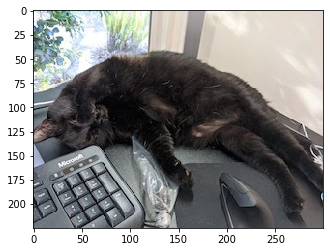

In [21]:
# Let's load the image
from matplotlib.image import imread
img = imread('cat.jpg')
plt.imshow(img)
plt.show()

This is one of my cats. I will let you admire its laziness. 

In [22]:
# This is the image size
img_size = img.shape
img_size

(225, 300, 3)

The image has dimension 247 x 300 x 3. Think of it as a matrix with 3 layers, where each layer is of dimension 247 x 300. If you explore the image, you will see it consists of many random values:

In [23]:
print(img)

[[[187 204 220]
  [214 232 246]
  [217 234 244]
  ...
  [224 214 205]
  [224 214 205]
  [224 214 205]]

 [[205 222 229]
  [225 242 249]
  [210 225 232]
  ...
  [226 216 207]
  [225 215 206]
  [225 215 206]]

 [[212 227 222]
  [245 255 255]
  [244 255 255]
  ...
  [224 214 205]
  [224 214 205]
  [223 213 204]]

 ...

 [[ 93 102 111]
  [103 112 121]
  [108 117 126]
  ...
  [109 104 101]
  [109 104 101]
  [109 104 101]]

 [[106 115 124]
  [109 118 127]
  [111 120 129]
  ...
  [110 105 102]
  [109 104 101]
  [109 104 101]]

 [[ 98 115 125]
  [ 98 115 125]
  [101 115 126]
  ...
  [106 102 101]
  [104 103 101]
  [104 103 101]]]


Each row is a pixel on the image. The goal here is to group similar pixels by replace it with the cluster mean. We will use KMeans to achieve this.

In [24]:
# First reshape it to be 2-dimensional
X = img.reshape(img_size[0] * img_size[1], img_size[2])
print(X.shape)

(67500, 3)


Here is your first task. Run K-Means on this reshaped data set with 30 clusters. Name your model ***compressed***.

In [25]:
# Run the Kmeans algorithm
from sklearn.cluster import KMeans

compressed = KMeans(n_clusters=30, random_state=123)
compressed.fit(X) 
# Have to fit your KMeans object first for it to have a label attribute
# Without fitting it throws an error: 'KMeans' object has no attribute 'labels_'

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

Now let's plot the original image and the compressed image, and compare the difference.

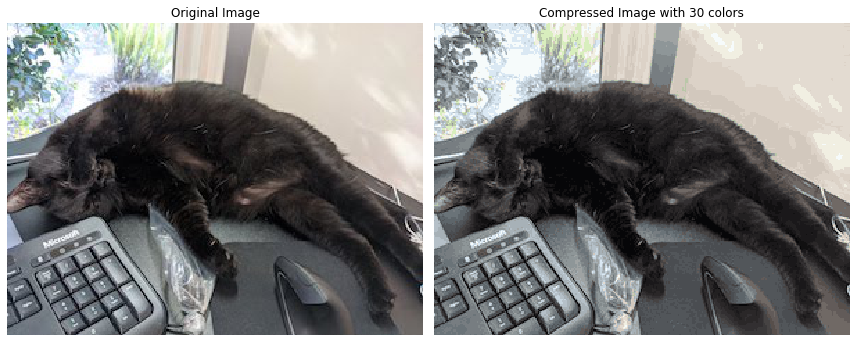

In [26]:
# Use the centroids to compress the image
X_compressed = compressed.cluster_centers_[compressed.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

Because we make the similar color into a same group, the graph on the right show a cat with only 30 colors. Since the cat is black, it is that easy to figure it our from the desk and keyboard. 

Now I want you to repeat the same procedure, but use the inertia to determine the best K value (it may take awhile to run for large K values).

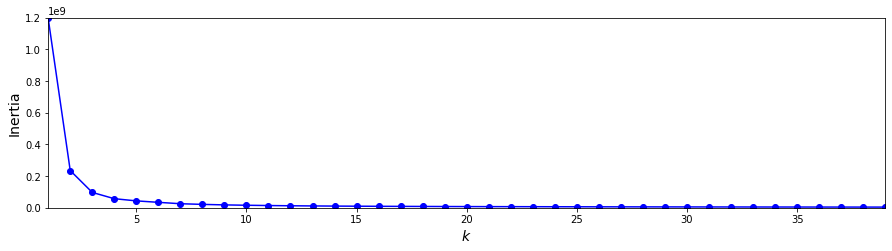

In [27]:
# Find best K
# Run K-Means with different start
kmeans_per_k = [KMeans(n_clusters=k, random_state=123).fit(X)
                for k in range(1, 40)]

# Extract the inertia for each model
inertias = [model.inertia_ for model in kmeans_per_k]

# Plot the inertia
plt.figure(figsize=(15, 3.5))
plt.plot(range(1, 40), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 39, 0, 1200000000])
plt.show()

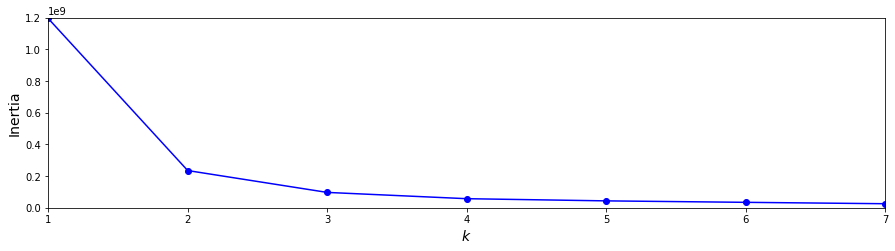

In [28]:
# narrow down to 1-8
kmeans_per_k = [KMeans(n_clusters=k, random_state=123).fit(X)
                for k in range(1, 8)]

# Extract the inertia for each model
inertias = [model.inertia_ for model in kmeans_per_k]

# Plot the inertia
plt.figure(figsize=(15, 3.5))
plt.plot(range(1, 8), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.axis([1, 7, 0, 1200000000])
plt.show()

In [29]:
# Redo the compression with your selected K value
new_compressed = KMeans(n_clusters=3, random_state=123)
new_compressed.fit(X) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

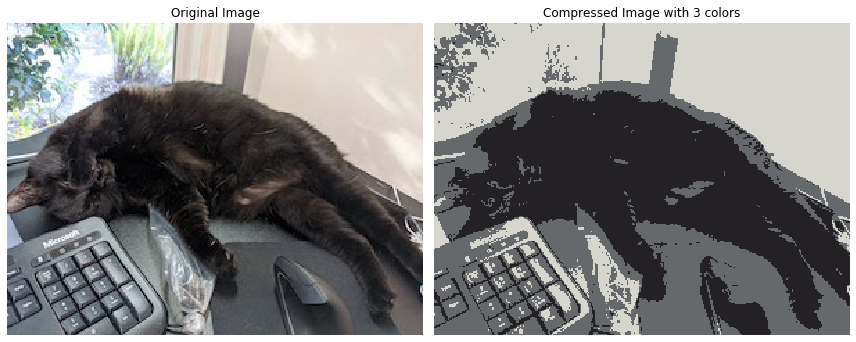

In [30]:
# Plot the old and new image
# Use the centroids to compress the image
X_compressed = new_compressed.cluster_centers_[new_compressed.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

# Reshape X_recovered to have the same dimension as the original image 128 * 128 * 3
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 3 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

When we use 3 colors on the right, we can see the colors become white, grey and black. We can still figure out the main content of the picture.

### Thank you